Summary

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

The nature of the problem is regression as we will have to predict the mpg (the continuous variable). We will have to use various regression models.

Attribute Information:

1. mpg: continuous (target variable)
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [89]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [90]:
#importing the dataset
df=pd.read_csv("Auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [91]:
#to display all rows
pd.set_option('display.max_rows',None)

In [92]:
#Checking the shape
df.shape
#There are 398 rows and 9 attributes in the dataset

(398, 9)

In [93]:
#Checking the datatypes
df.dtypes
#Except car name, all attributes are either float or int

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

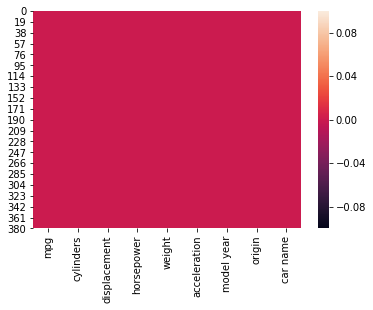

In [94]:
#Checking for missing values
sns.heatmap(df.isnull())

In [95]:
df.isnull().sum()
#There are no missing values in the dataset

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

#### Univariate Analysis

In [96]:
#Checking the unique values and its count in the dataset
for i in df.columns:
    print(df[i].value_counts())
    print()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
16.0    13
19.0    12
24.0    11
25.0    11
28.0    10
22.0    10
23.0    10
20.0     9
27.0     9
29.0     8
21.0     8
30.0     7
31.0     7
17.0     7
12.0     6
36.0     6
32.0     6
17.5     5
15.5     5
11.0     4
38.0     4
20.2     4
21.5     3
33.0     3
18.5     3
19.2     3
16.5     3
27.2     3
37.0     3
33.5     3
20.5     3
29.8     2
34.0     2
34.5     2
29.5     2
30.5     2
25.5     2
31.5     2
24.5     2
26.6     2
35.0     2
10.0     2
32.4     2
17.6     2
23.9     2
19.4     2
34.1     2
25.4     2
20.6     2
18.1     2
36.1     2
26.4     1
44.3     1
40.8     1
27.9     1
24.3     1
34.3     1
22.5     1
14.5     1
32.3     1
28.4     1
28.1     1
26.5     1
37.3     1
27.4     1
33.8     1
18.6     1
29.9     1
16.9     1
19.8     1
34.4     1
35.1     1
23.7     1
21.6     1
36.4     1
23.8     1
18.2     1
25.8     1
23.2     1
21.1     1
17.7     1
9.0      1
31.3     1
22.4     1
31.9     1
37.7     1

Attribute information:
1. mpg: Miles Per Gallon
This column gives information about the fuel performance in terms of miles per gallon of fuel. There are 129 unique value

2. Cylinder
Each cylinder has a piston inside which pumps the oil into the crankshaft. The more cylinders on a vehicle, the more pistons are pumping. The result is more power being generated in a shorter amount of time. The engine doesn’t have to work as hard to reach higher speeds. A vehicle with higher cylinder numbers will be better equipped to carry heavier loads, such as a V6 or V8. The number of cylinders also impacts how much weight can be towed behind the vehicle with more cylinders carrying added weight.

Because the V6 or V8 engines have more power and work harder, they also burn more fuel than an I-4 engine. With new technology being used in developing engines, this disparity is lessening. However, in most cases, a bigger engine with more cylinders will always have more power and better performance.

In this dataset, there are 3,4,5,6 and 8 unique values of cylinder.
Hence 8 denotes higher capacity and 3 denotes the lesser capacity.

3. Displacement
Engines are measured by displacement, usually expressed in liters (L) or cubic centimeters (cc). Displacement is the total volume of all the cylinders in an engine. An engine with four cylinders of 569cc each totals 2276cc, and will be rounder off and referred to as a 2.3 liter engine.

Engine displacement is a determining factor in the horsepower and torque that an engine produces, as well as how much fuel that engine consumes. Generally speaking, the higher an engine’s displacement the more power it can create, while the lower the displacement the less fuel it can consume. This is because displacement has a direct impact on how much fuel must be drawn into a cylinder to create power and maintain engine operation. A high-displacement engine draws in more of the air/fuel mixture per revolution; therefore more fuel is consumed. Other factors play into how powerful or efficient an engine is, such as fuel delivery, ignition systems, valvetrain layout, and forced induction, but in the simplest terms a bigger engine will be more powerful, and a smaller engine will be more efficient.

Here in the dataset, displacement per cylinder is probably mentioned. And there are 82 unique values.

4. Horsepower
The power an engine produces is called horsepower. In mathematical terms, one horsepower is the power needed to move 550 pounds one foot in one second, or the power needed to move 33,000 pounds one foot in one minute. Generally speaking, the more horsepower a car produces, the better its acceleration, which is a strong factor in its overall performance. ... The engines in high-performance cars are tuned so that the horsepower and torque ratings complement each other and provide a well-balanced driving experience.

There are 94 unique values in the dataset. Horsepower has '?' values in six places which needs to be replaced.

5. weight
weight of cars which is measured either in pounds or kgs.

In this dataset there are 351 unique values.

6. acceleration
A car that can accelerate in a short amount of time is considered to be eye candy for anyone with a taste in vehicles. The faster that a car can accelerate to a high velocity is crucial to its performance and handling. A car's acceleration is calculated when the car is not in motion (0 mph), until the amount of time it takes to reach a velocity of 60 miles per hour. This means that the initial velocity is zero and the final velocity is 60 miles per hour (26.82 meters per second).

In this dataset it has 95 unique values.

7. model year
The car belongs to the 13 different years. From 1970 to 1982.

8. origin
It means country of origin (1. American, 2. European, 3. Japanese)

9. car names
It has 305 unique names. So not unique to each row and some are repeated.



In [103]:
#Replacing the '?' value in horsepower with mean. First we need to replace it with 0
df['horsepower']=df['horsepower'].replace('?','0') #replacing '?' with '0'
df['horsepower']=df['horsepower'].astype('int')  #converting the datatype from object to int


In [104]:
df['horsepower']=df['horsepower'].replace(0, df['horsepower'].mean()) #Finally replacing 0 with the mean
df['horsepower']

0      130.000000
1      165.000000
2      150.000000
3      150.000000
4      140.000000
5      198.000000
6      220.000000
7      215.000000
8      225.000000
9      190.000000
10     170.000000
11     160.000000
12     150.000000
13     225.000000
14      95.000000
15      95.000000
16      97.000000
17      85.000000
18      88.000000
19      46.000000
20      87.000000
21      90.000000
22      95.000000
23     113.000000
24      90.000000
25     215.000000
26     200.000000
27     210.000000
28     193.000000
29      88.000000
30      90.000000
31      95.000000
32     102.894472
33     100.000000
34     105.000000
35     100.000000
36      88.000000
37     100.000000
38     165.000000
39     175.000000
40     153.000000
41     150.000000
42     180.000000
43     170.000000
44     175.000000
45     110.000000
46      72.000000
47     100.000000
48      88.000000
49      86.000000
50      90.000000
51      70.000000
52      76.000000
53      65.000000
54      69.000000
55      60

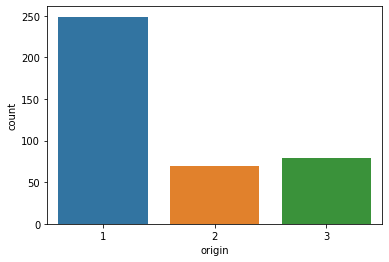

In [105]:
sns.countplot(df['origin'])
#The dataset has more no. of cars of USA origin followed by Japanese and European, the difference between Japan and Europe cars are negligible

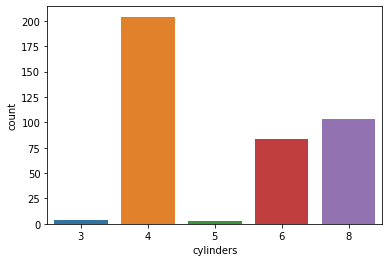

In [106]:
sns.countplot(df['cylinders'])
#Most no of cars in the data set have 4 cylinders followed by 8 and 6.. 3 and 5 are in very less count.  

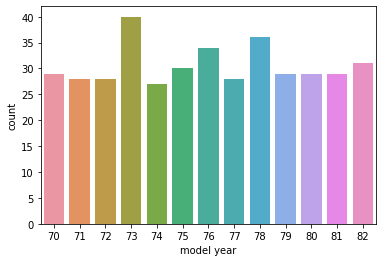

In [107]:
sns.countplot(df['model year'])
#The no of cars for each year are almost above 25. Year 73 has around 40, 78 and 76 around 35

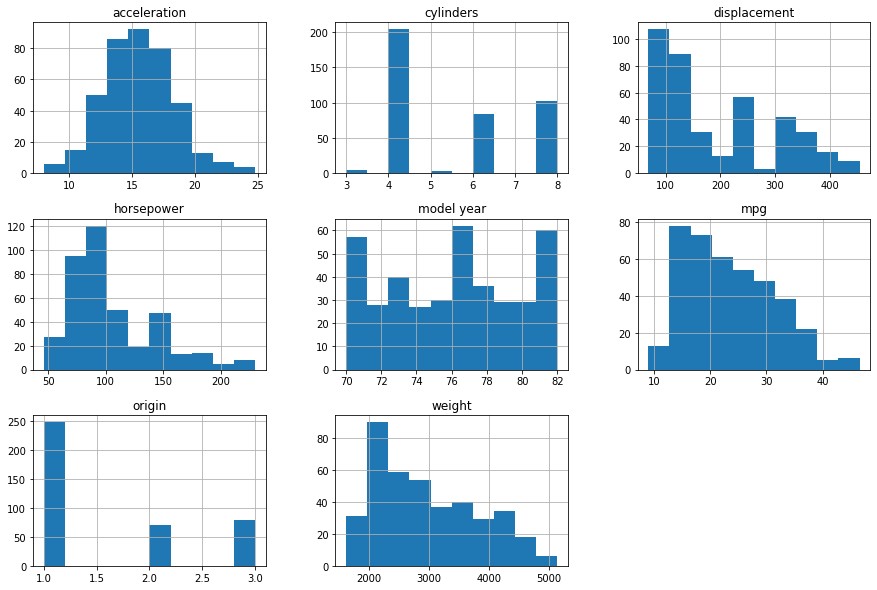

In [108]:
df.hist(figsize=(15,10))
plt.show()

Observations:
1. Most of values of acceleration are concentrated between 14 and 18.
2. Most no of cars have 4 cylinders.
3. Most of the displacement is between 50-150.
4. The values in mpg are concentrated mostly around 15-30.
5. Cars are mostly from the origin 1 - USA
6. Weight of the car are mostly around 2000-3000. Above 4000 it is rare.

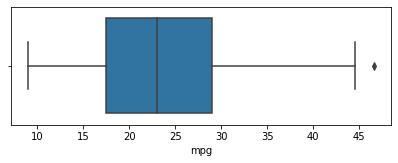

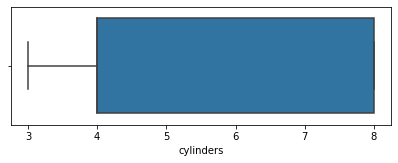

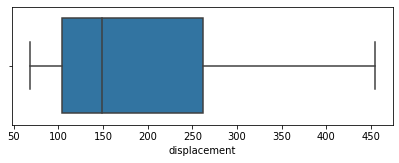

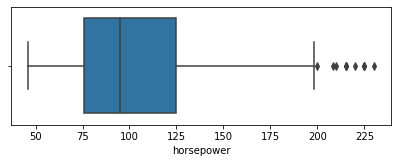

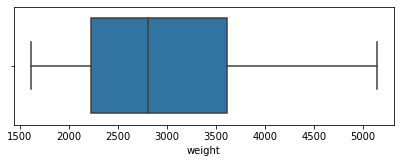

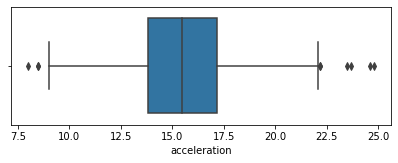

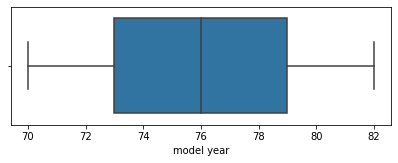

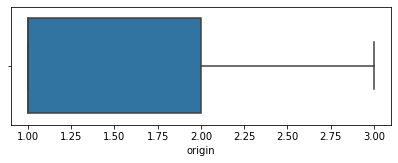

In [109]:
#checking the outliers using the box plot

for i in df.columns:
    if df[i].dtype!='O':
        plt.figure(figsize=(15,10))
        plt.subplot(4,2,1)
        sns.boxplot(df[i])

In [110]:
#There are only few outliers in the dataset

#### Statistical analysis

In [111]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.445645,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199671,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Observations
1. The mean mpg is 23.
2. The max weight of car is 5140, mean weight is 2803 and min weight is 1613 in the given dataset
3. The max displacement is 455, mean is 148 and minimum is 104.

#### Bivariate Analysis

In [112]:
df.groupby('origin').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
origin,,,,,,,
1,20.083534,6.248996,245.901606,118.789469,3361.931727,15.033735,75.610442
2,27.891429,4.157143,109.142857,81.196985,2423.300000,16.787143,75.814286
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038


In [113]:
df.sort_values('origin')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.000000,3504,12.0,70,1,chevrolet chevelle malibu
227,19.0,6,225.0,100.000000,3630,17.7,77,1,plymouth volare custom
226,20.5,6,231.0,105.000000,3425,16.9,77,1,buick skylark
225,17.5,6,250.0,110.000000,3520,16.4,77,1,chevrolet concours
224,15.0,8,302.0,130.000000,4295,14.9,77,1,mercury cougar brougham
223,15.5,8,318.0,145.000000,4140,13.7,77,1,dodge monaco brougham
222,17.0,8,260.0,110.000000,4060,19.0,77,1,oldsmobile cutlass supreme
228,18.5,6,250.0,98.000000,3525,19.0,77,1,ford granada
221,17.5,8,305.0,145.000000,3880,12.5,77,1,chevrolet caprice classic
217,30.0,4,111.0,80.000000,2155,14.8,77,1,buick opel isuzu deluxe


Observations
1. USA has produced all varieties 8, 6 and 4 cylinder types. The average cylinders is coming to 6.4.
2. Europe and Japan have produced more 4 and few 6 cylinder types of car. Their average is over 4.
3. However, Europe and Japan cars have more average of mpg when compared to USA. It means USA cars are giving less mileage on average 
4. In terms of displacement and weight, USA cars are substantial at higher end. This may explain the reason for less mileage for USA cars.
5. Average acceleration of USA cars is around 15 whereas of Europe and Japan is over 16.
6. The average year of manufacture of cars in Japan is 77 and that of USA and Europe it is 75.

In [114]:
df.groupby('model year').mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
model year,,,,,,,
70,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276,1.310345
71,21.250000,5.571429,209.750000,106.889088,2995.428571,15.142857,1.428571
72,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000,1.535714
73,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500,1.375000
74,22.703704,5.259259,171.740741,94.551647,2877.925926,16.203704,1.666667
75,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000,1.466667
76,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176,1.470588
77,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714,1.571429
78,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556,1.611111


In [115]:
df.sort_values(by='model year')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.000000,3504,12.0,70,1,chevrolet chevelle malibu
28,9.0,8,304.0,193.000000,4732,18.5,70,1,hi 1200d
27,11.0,8,318.0,210.000000,4382,13.5,70,1,dodge d200
26,10.0,8,307.0,200.000000,4376,15.0,70,1,chevy c20
25,10.0,8,360.0,215.000000,4615,14.0,70,1,ford f250
24,21.0,6,199.0,90.000000,2648,15.0,70,1,amc gremlin
23,26.0,4,121.0,113.000000,2234,12.5,70,2,bmw 2002
22,25.0,4,104.0,95.000000,2375,17.5,70,2,saab 99e
21,24.0,4,107.0,90.000000,2430,14.5,70,2,audi 100 ls
19,26.0,4,97.0,46.000000,1835,20.5,70,2,volkswagen 1131 deluxe sedan


Observations:
1. In the recent years under review, the importance has been given in providing more mileage for the cars, as we can see mileage average has increased from 20s to 30s.
2. Weight of the cars have been reduced from avg of 3000 to avg of 2500.
3. Average of cylinders has been reduced from over 5 to around 4.
4. Acceleration has been increased from avg 12 to avg 16.

In [116]:
df.groupby('cylinders').mean()

,mpg,displacement,horsepower,weight,acceleration,model year,origin
cylinders,,,,,,,
3,20.550000,72.500000,99.250000,2398.500000,13.250000,75.500000,3.000000
4,29.286765,109.796569,78.884668,2308.127451,16.601471,77.073529,1.985294
5,27.366667,145.000000,82.333333,3103.333333,18.633333,79.000000,2.000000
6,19.985714,218.142857,101.522553,3198.226190,16.263095,75.928571,1.190476
8,14.963107,345.009709,158.300971,4114.718447,12.955340,73.902913,1.000000


Observations
1. Cars with more cylinders gives less mileage ex:- 8 gives mileage around 15. whereas cylinders about 3 cylinders, gives around 20.
2. More no. of cylinders give more displacement and less no. of cylinders give less displacement.
3. However more cylinders are giving less acceleration, 8 is giving around average 13 whereas 5 is giving around average 18.
4. Cylinder 3 cars are produced only by Japan in this given dataset and are only four in counts.


In [117]:
df.sort_values(by='cylinders')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
111,18.0,3,70.0,90.000000,2124,13.5,73,3,maxda rx3
71,19.0,3,70.0,97.000000,2330,13.5,72,3,mazda rx2 coupe
334,23.7,3,70.0,100.000000,2420,12.5,80,3,mazda rx-7 gs
243,21.5,3,80.0,110.000000,2720,13.5,77,3,mazda rx-4
267,27.5,4,134.0,95.000000,2560,14.2,78,3,toyota corona
266,30.0,4,98.0,68.000000,2155,16.5,78,1,chevrolet chevette
255,25.1,4,140.0,88.000000,2720,15.4,78,1,ford fairmont (man)
248,36.1,4,91.0,60.000000,1800,16.4,78,3,honda civic cvcc
247,39.4,4,85.0,70.000000,2070,18.6,78,3,datsun b210 gx
245,36.1,4,98.0,66.000000,1800,14.4,78,1,ford fiesta


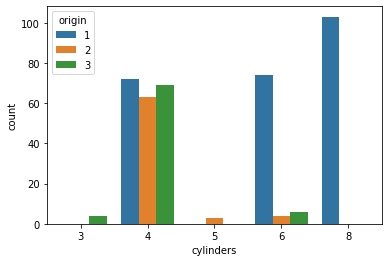

In [118]:
sns.countplot(df['cylinders'], hue=df['origin'])

Observations:
1. Cylinder 3 cars is produced only by Japan.
2. Cylinder 5 cars is produced only by Europe.
3. Cylinder 8 cars is produced only by USA.
4. Cylinder 4 cars are produced by all three countries and the count is also almost same.
5. Cylinder 6 is mostly produced by USA and few by Japan and Europe.

So we can understand that higher end cars are mostly produced by USA. The reasons for the same may be many and needs more data and further investigation.

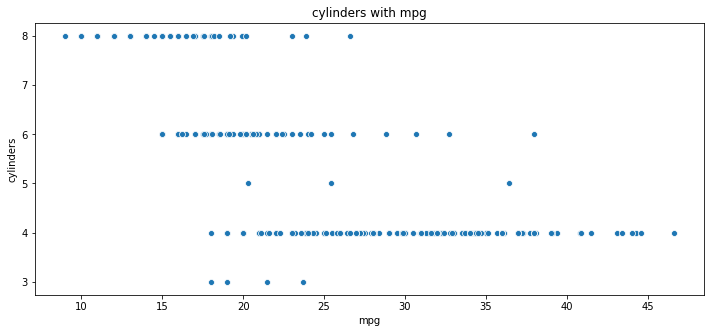

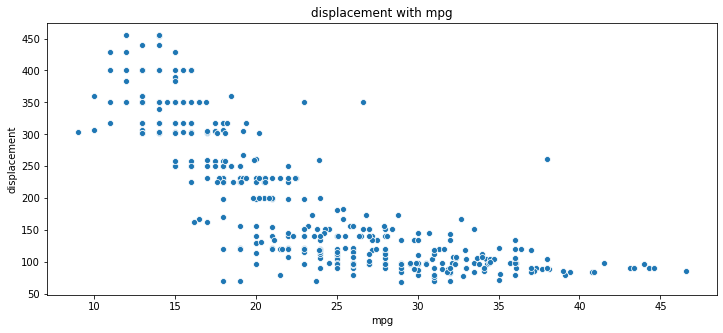

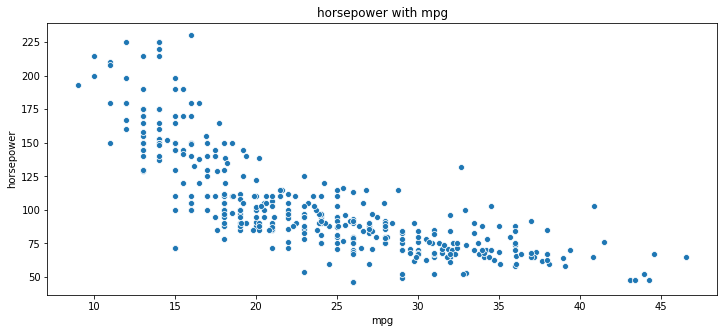

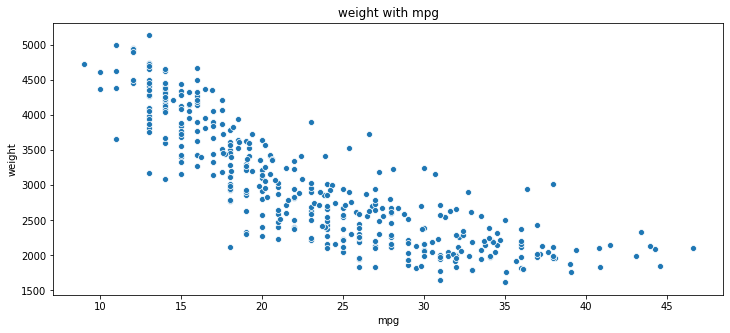

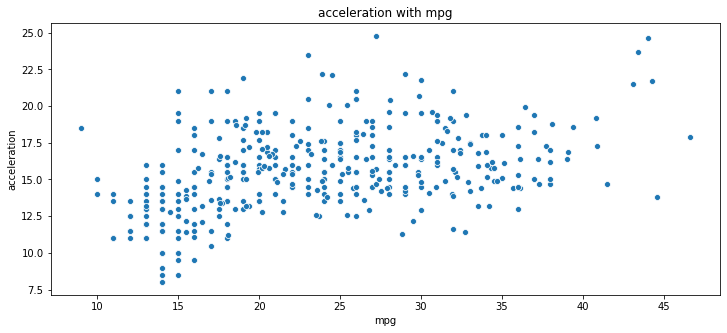

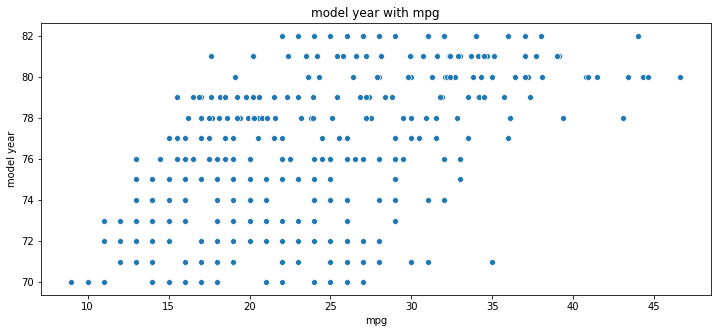

In [119]:
#scatter plots. checking the attributes relationship with the target 'mpg'
cols=df.iloc[:,1:7]
for i in cols:
    plt.figure(figsize=(12,5))
    plt.title(str(i)+' with '+'mpg')
    sns.scatterplot(x=df['mpg'], y=df[i], data=df)
    plt.show()

Observations:
1. Displacement and weight have negative correlation with the mpg.
2. Acceleration and model year has positive correlation with the mpg.

#### Correlation

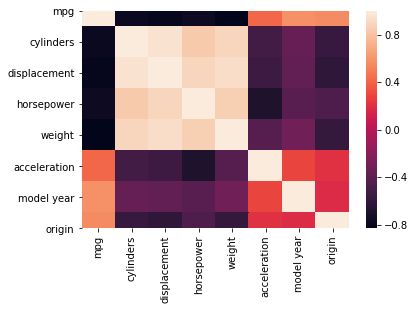

In [120]:
sns.heatmap(df.corr())

In [121]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771785,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.839340,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.894020,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771785,0.839340,0.894020,1.000000,0.860908,-0.684646,-0.411981,-0.453477
weight,-0.831741,0.896017,0.932824,0.860908,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684646,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411981,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453477,-0.581024,0.205873,0.180662,1.000000


Observations:
1. Cylinders, weight and displacement have positive correlation with each other.
2. Cylinders, weight and displacement are negatively correlated to mpg.
3. mpg has positive correlation with acceleration, model year and origin.


In [122]:
#removing unwanted columns
#The car name is not required for model building purpose and can be removed
df=df.drop('car name', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


#### removing outliers

In [124]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print("The datashape before removing outliers is ", df.shape)
df=df[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df.shape)

The datashape before removing outliers is  (398, 8)
The datashape after removing outliers is  (391, 8)


#### splitting the data into input and output variables

In [125]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [126]:
x=df.iloc[:,1:]
y=pd.DataFrame(df.iloc[:,0])
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [127]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


#### checking the skewness

In [128]:
x.skew()

cylinders       0.552494
displacement    0.690697
horsepower      0.979757
weight          0.542438
acceleration    0.217097
model year      0.004518
origin          0.911256
dtype: float64

In [131]:
#using sqrt method to remove the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [132]:
x.skew()
#This has reduced skewness to a certain extent

cylinders       0.471350
displacement    0.455655
horsepower      0.651018
weight          0.542438
acceleration    0.217097
model year      0.004518
origin          0.812946
dtype: float64

#### Pre Processing the data

In [133]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,2.828427,17.521415,11.401754,3504,12.0,70,1.0
1,2.828427,18.708287,12.845233,3693,11.5,70,1.0
2,2.828427,17.832555,12.247449,3436,11.0,70,1.0
3,2.828427,17.435596,12.247449,3433,12.0,70,1.0
4,2.828427,17.378147,11.832160,3449,10.5,70,1.0


In [134]:
#We need to scale the data for normalising the input data and for the same we can use Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6
0,1.0,0.728612,0.586181,0.536150,0.254777,0.0,0.0
1,1.0,0.821846,0.769350,0.589736,0.222930,0.0,0.0
2,1.0,0.753053,0.693495,0.516870,0.191083,0.0,0.0
3,1.0,0.721870,0.693495,0.516019,0.254777,0.0,0.0
4,1.0,0.717357,0.640797,0.520556,0.159236,0.0,0.0


In [137]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [138]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.8521592425451319 is achieved at random state 60


In [139]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=60,test_size=0.20)

In [140]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [141]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mse'}

In [142]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [145]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.8521592425451319
The cross val score is 0.5285530075987354
The mean squared error is 8.271432410388423
The root mean squared error is 2.8760098070744515




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.8020376265568713
The cross val score is 0.6544164613514476
The mean squared error is 11.075649367088607
The root mean squared error is 3.328009820762043




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
The r2 score is 0.6460766761

In [146]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.852159,0.528553,8.271432,2.876010
1,KNeighborsRegressor,0.802038,0.654416,11.075649,3.328010
2,DecisionTreeRegressor,0.646077,0.469180,19.801392,4.449876
3,SVR,0.845340,0.714976,8.652932,2.941587


In [147]:
#Let us try to boost our scores by trying boosters and lasso and ridge

#### Lasso

In [148]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(ls,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.01}

In [149]:
#Let us check the best r2 score for Lasso
ls=Lasso(alpha=0.01)
max_r2_score(ls,x,y)

The maximum r2 score 0.852499589583293 is achieved at random state 85


In [151]:
#Let us check the cross val score for lasso
cross=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.5869099976788126


#### Ridge

In [153]:
#Let us check the best parameters for Ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(rd,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.1}

In [154]:
#Let us check the best r2 score for Ridge
rd=Ridge(alpha=0.1)
max_r2_score(rd,x,y)

The maximum r2 score 0.8513617040742065 is achieved at random state 85


In [155]:
#Let us check the cross val score for Ridge
cross=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.5818238936713132


#### Ensemble Techniques

##### Random Forest

In [157]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [158]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500), 'criterion':('mse','mae')}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'criterion': 'mae', 'n_estimators': 500}

In [160]:
#Lets check the r2 score 
rf=RandomForestRegressor(criterion='mae',n_estimators=500)
max_r2_score(rf,x,y)

The maximum r2 score 0.9320239479255877 is achieved at random state 92


In [161]:
#Lets check the cross val score
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.7383353596536797


#### GradientBoostingRegressor

In [162]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'loss':('ls','lad','huber','quantile'), 'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500,1000), 'criterion':('friedman_mse', 'mse', 'mae')}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 50}

In [163]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(criterion='mse',n_estimators=50,learning_rate=0.01,loss='huber')
max_r2_score(gb,x,y)

The maximum r2 score 0.5799590184775336 is achieved at random state 82


In [164]:
#Lets check the cross val score
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.07748753952738623


#### AdaBoostRegressor

In [165]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1),'loss':('linear','square','exponential')}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 500}

In [166]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=500,learning_rate=0.1,loss='exponential')
max_r2_score(ad,x,y)

The maximum r2 score 0.8884864959549835 is achieved at random state 92


In [167]:
#Lets check the cross val score
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is 0.7083448361645801


In [168]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.852,0.851,0.932,0.58,0.889],'Cross_val_score':[0.587,0.582,0.738,-0.077,0.708]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.852,0.587
1,Ridge,0.851,0.582
2,RandomForestRegressor,0.932,0.738
3,GradientBoostRegressor,0.580,-0.077
4,AdaBoostRegressor,0.889,0.708


In [169]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.852159,0.528553,8.271432,2.876010
1,KNeighborsRegressor,0.802038,0.654416,11.075649,3.328010
2,DecisionTreeRegressor,0.646077,0.469180,19.801392,4.449876
3,SVR,0.845340,0.714976,8.652932,2.941587


In [170]:
#by comparing the results, we can conclude that Random Forest Regressor is performing better in r2 score and cross val scores. 
#So we can finalise the same.
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=92,test_size=0.20)
rf=RandomForestRegressor(criterion='mae',n_estimators=500)
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
r2score=r2_score(test_y,pred)
print("The r2 score is", r2score)
crosscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", crosscore)
pd.DataFrame(pred).to_csv("Project10_AutoMPG_predictions.csv")

The r2 score is 0.9328398322150622
The cross val score is 0.7362236314709218


In [171]:
#saving the finalised model
from sklearn.externals import joblib
joblib.dump(rf,'AutoMPG.pkl')

['AutoMPG.pkl']